In [1]:
import tensorflow as tf
import numpy as np
import os
import scipy.io as sio # for working with .mat files
import matplotlib.pyplot as plt

In [6]:
# current working directory
cwd = os.getcwd()

# change directory
os.chdir('.')

# List all files and directories in current directory
os.listdir('.')


['.ipynb_checkpoints',
 'd4Prediction_TimeDelayedNet.m',
 'd5PredikceSpotrebyEnergie.m',
 'Data2001.xls',
 'PM100100.DBF',
 'ProjectNN2.pdf',
 'projekt2_predikce.ipynb',
 'Q.MAT']

In [2]:
# load data from Q.mat
data = sio.loadmat('Q.MAT')

# convert to np array
data = np.array(data['Q'],dtype=np.float32)

# normalize the data to interval (0,1)
data = np.divide(np.subtract(data,np.min(data)),np.subtract(np.max(data),np.min(data)))

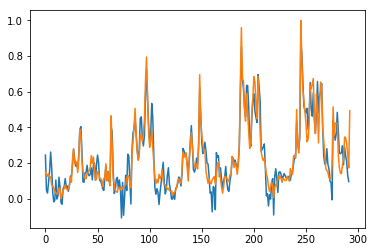

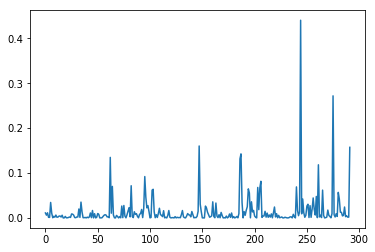

In [31]:
## NETWORK SETTINGS
# network learning rate
alpha = 0.2

# define the batch size
batch_size = 20

# delay (how many values to the future do we predict)
delay = 1

# rows of input and target vectors
rows = 1

# define number of neurons
n_of_neurons_in = 5; # input layer neurons
n_of_neurons_out = 1; # output layer neurons

## INPUT (Patterns)
# placeholder for batches of data from which we predict the values (Pattern vector)
P = tf.placeholder(tf.float32,shape=(batch_size,rows),name='pattern_vector')

## TARGET (Labels)
# placeholder for batches of target values
T = tf.placeholder(tf.float32,shape=(delay,rows),name='target_vector')

## INPUT LAYER
# input layer weights and biases
weights_in = tf.Variable(np.random.normal(size=(n_of_neurons_in,batch_size)),dtype=tf.float32)
biases_in = tf.Variable(np.random.normal(size=(n_of_neurons_in,1)),dtype=tf.float32)

input_layer = (tf.matmul(weights_in,P) + biases_in)

# tansig of the input_layer => activations of input layer
activations_in = tf.tanh(tf.sigmoid(input_layer),name='activations_in')

## OUTPUT LAYER
# output layer weights and biases
weights_out = tf.Variable(np.random.normal(size=(n_of_neurons_out,n_of_neurons_in)),dtype=tf.float32)
biases_out = tf.Variable(np.random.normal(size=(n_of_neurons_out)),dtype=tf.float32)

output_layer = (tf.matmul(weights_out,activations_in) + biases_out)

## Error (loss function) (sum of squared errors)
# error = tf.square((tf.subtract(output_layer,T)))
error = tf.losses.mean_squared_error(T,output_layer)

model = tf.train.GradientDescentOptimizer(alpha).minimize(error)

# number of steps
n_of_steps = np.shape(data)[1] - batch_size - 1

# initialize list for error values
error_list = []
prediction_list = []

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(n_of_steps):
        _, error_val, predictions = session.run((model, error, output_layer), feed_dict={P: np.reshape(data[:,i:i+batch_size],(batch_size,1)), T: np.reshape(data[:,i+batch_size+1],(1,1))})
        error_list.append(error_val)
        prediction_list.extend(predictions)
        
plt.plot(prediction_list)
plt.plot(data[0,batch_size:])
plt.show()
plt.plot(error_list)
plt.show()

In [44]:
# load data from Q.mat
data = sio.loadmat('Q.MAT')

# convert to list
data = data['Q']

# convert them to np array
data = np.array(data)

print(len(data))

1


In [16]:
print(np.shape(weights_in),np.shape(P))
print(np.shape(input_layer))
print(np.shape(activations_in))
print(np.shape(output_layer))
print(np.shape(np.transpose(data[:,1:1+batch_size])))
print(np.shape(data[0,0+batch_size+1]))
print(np.shape(np.reshape(data[:,0+batch_size+1],(1,1))))
print(np.reshape(data[:,0+batch_size+1],(1,1)))
print(type(np.reshape(data[:,0+batch_size+1],(1,1))))
print(error_list)

print(np.shape(data))

(20, 10) (10, 1)
(20, 1)
(20, 1)
(1, 1)
(10, 1)
()
(1, 1)
[[ 0.41667622]]
<class 'numpy.ndarray'>
[17.934168, 2.469753, 0.055114534, 0.088134728, 0.17531715, 0.28379413, 0.08971706, 0.0015843166, 0.18639092, 0.036038689, 0.00022212943, 0.0072695604, 0.015120496, 0.0017117461, 0.043536089, 0.020703027, 0.10247993, 0.065418385, 0.031015854, 0.01964383, 8.647616e-07, 0.0022557732, 0.0011265252, 0.00044980989, 0.019866984, 0.0058203819, 0.008283399, 0.002277185, 0.0010488958, 0.0013213702, 0.0012745169, 0.0051089502, 0.0012309045, 4.6023255e-05, 0.035801698, 0.0046227784, 0.0011565783, 0.0046238787, 0.05117356, 0.00072456076, 0.027970541, 0.022598699, 0.12683453, 0.001235811, 0.016970033, 0.16802706, 0.06349726, 0.014906382, 0.0085650943, 0.076297998, 0.10042883, 2.3545279e-06, 0.14469881, 0.00028762728, 0.00015990635, 0.0015231072, 0.010476147, 0.0049126046, 0.00042040934, 0.0092867771, 0.011358999, 0.012152216, 0.0065602902, 0.061556529, 0.0075829993, 0.029266324, 0.015552761, 0.05141834